                                       ADITYA MANWATKAR (3rd YEAR, AI & DS)

# Practical No. 5
## Aim- Digit Recognition using RAMDOM FOREST ALGORITHM

#### Importing Basic Library

In [1]:
import pandas as pd
import numpy as np

#### Load Dataset

In [2]:
data = pd.read_csv("digit.csv")

### Summerize Dataset

In [3]:
print(data.shape)
data.head(5)

(1500, 785)


,Label,Pixel 1,Pixel 2,Pixel 3,Pixel 4,Pixel 5,Pixel 6,Pixel 7,Pixel 8,Pixel 9,...,Pixel 775,Pixel 776,Pixel 777,Pixel 778,Pixel 779,Pixel 780,Pixel 781,Pixel 782,Pixel 783,Pixel 784
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Columns: 785 entries, Label to Pixel 784
dtypes: int64(785)
memory usage: 9.0 MB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Label,1500.0,4.42,2.882558,0.0,2.0,4.0,7.0,9.0
Pixel 1,1500.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0
Pixel 2,1500.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0
Pixel 3,1500.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0
Pixel 4,1500.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
Pixel 780,1500.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0
Pixel 781,1500.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0
Pixel 782,1500.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0
Pixel 783,1500.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0


#### Segregate Dataset into X(Input/indepemdentVariable) & Y(Output/DependentVariable)

In [6]:
x = data.iloc[:,1:]
print(x.shape)
x

(1500, 784)


,Pixel 1,Pixel 2,Pixel 3,Pixel 4,Pixel 5,Pixel 6,Pixel 7,Pixel 8,Pixel 9,Pixel 10,...,Pixel 775,Pixel 776,Pixel 777,Pixel 778,Pixel 779,Pixel 780,Pixel 781,Pixel 782,Pixel 783,Pixel 784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
y = data.iloc[:,0]
print(y)
print(y.shape)

0       1
1       0
2       1
3       4
4       0
       ..
1495    0
1496    1
1497    2
1498    8
1499    2
Name: Label, Length: 1500, dtype: int64
(1500,)


### Splitting Dataset into Test & Train

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 5)

In [9]:
x_test
y_test

656     9
931     7
822     8
669     2
1187    7
       ..
540     1
955     7
425     8
595     6
699     6
Name: Label, Length: 375, dtype: int64

## Training the model

In [10]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [11]:
y_pred = model.predict(x_test)
y_pred

array([9, 7, 8, 2, 7, 4, 0, 2, 1, 5, 0, 5, 5, 2, 7, 3, 2, 3, 7, 5, 1, 7,
       4, 4, 2, 7, 8, 9, 0, 2, 7, 1, 6, 7, 0, 2, 7, 1, 6, 5, 7, 9, 3, 1,
       7, 9, 7, 6, 4, 5, 5, 5, 8, 9, 8, 9, 0, 6, 6, 2, 9, 9, 7, 7, 2, 2,
       9, 0, 4, 9, 2, 7, 1, 7, 3, 9, 7, 3, 2, 4, 0, 4, 2, 2, 8, 0, 1, 8,
       2, 7, 9, 8, 7, 0, 8, 8, 1, 2, 7, 5, 9, 8, 1, 3, 3, 3, 4, 1, 7, 9,
       6, 1, 3, 1, 8, 3, 6, 7, 3, 1, 4, 9, 3, 9, 8, 5, 2, 0, 4, 7, 5, 4,
       0, 4, 5, 0, 2, 6, 1, 6, 6, 9, 9, 7, 7, 1, 3, 2, 3, 1, 1, 4, 7, 1,
       6, 6, 8, 4, 6, 7, 1, 5, 6, 1, 1, 0, 1, 1, 6, 4, 9, 4, 7, 1, 1, 7,
       8, 1, 7, 1, 6, 6, 8, 2, 1, 4, 2, 2, 9, 7, 1, 9, 9, 0, 4, 5, 2, 8,
       9, 8, 9, 6, 7, 3, 6, 0, 7, 5, 1, 1, 5, 7, 0, 6, 0, 3, 0, 0, 7, 6,
       3, 9, 9, 0, 6, 0, 5, 6, 1, 3, 7, 4, 8, 6, 4, 7, 9, 3, 7, 7, 0, 2,
       7, 1, 4, 6, 5, 2, 1, 4, 4, 2, 2, 1, 3, 5, 0, 9, 9, 6, 3, 4, 8, 0,
       5, 7, 1, 6, 0, 2, 1, 9, 8, 4, 1, 7, 7, 6, 5, 6, 7, 5, 7, 6, 2, 1,
       8, 5, 0, 9, 1, 0, 7, 1, 7, 3, 3, 0, 1, 7, 8,

### Model Accuracy

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
print("Accuracy of the model: {0}%".format(accuracy_score(y_test, y_pred)*100))

[[35  0  0  0  0  1  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  1  2  1  1]
 [ 0  2  1 26  0  2  0  0  0  1]
 [ 0  0  0  0 25  0  0  1  0  3]
 [ 0  2  0  1  0 25  0  0  0  0]
 [ 1  0  0  0  2  1 35  0  0  0]
 [ 0  1  0  0  1  0  0 56  0  1]
 [ 0  1  2  2  0  0  0  0 30  2]
 [ 0  0  0  1  1  0  0  1  0 31]]
Accuracy of the model: 90.4%


Predicted 8


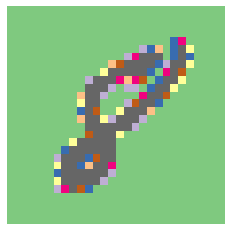

In [13]:
import matplotlib.pyplot as plt
index =2
print("Predicted " + str(model.predict(x_test)[index]))
plt.axis("off")
plt.imshow(x_test.iloc[index].values.reshape((28,28)),cmap="Accent")